## The Sparks Foundation

## Data Science & Business Analytics Internship

## Name- Smita Vijaykumar Pisal

## Task 1: Prediction Using Supervised ML

## Aim- To predict the percentage of an student based on the no. of study hours.


Importing libraries

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import the dataset

In [43]:
student_df=pd.read_csv(r"C:\Users\Sanket Pisal\Desktop\student.csv")

In [44]:
student_df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


Information of data

In [45]:
student_df.shape


(25, 2)

In [46]:
# check if any null value is present
student_df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [47]:
student_df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


Data Visualization

In [48]:
import seaborn as sns

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


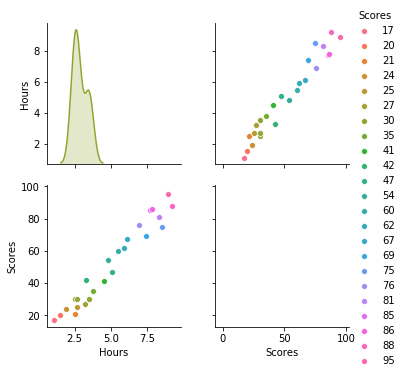

In [49]:
sns.pairplot(student_df,hue = 'Scores')

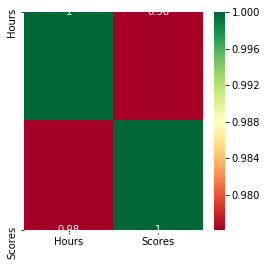

In [50]:
## Correlation
import seaborn as sns
import matplotlib.pyplot as plt
#get correlations of each features in dataset
corrmat = student_df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(4,4))
#plot heat map
g=sns.heatmap(student_df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [51]:
student_df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


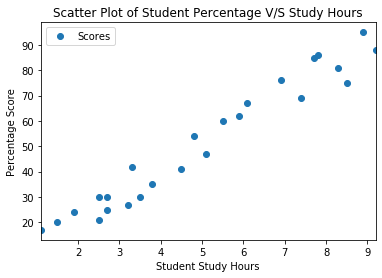

In [52]:
# Plotting the distribution of scores
student_df.plot(x='Hours', y='Scores', style='o')  
plt.title('Scatter Plot of Student Percentage V/S Study Hours')  
plt.xlabel('Student Study Hours')  
plt.ylabel('Percentage Score')  
plt.show()

Prepare the data for Training

In [53]:
X=student_df.iloc[:,:-1].values
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [54]:
y=student_df.iloc[:,1].values
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

In [61]:
#Split the dataset into Training & Testing set
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [62]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

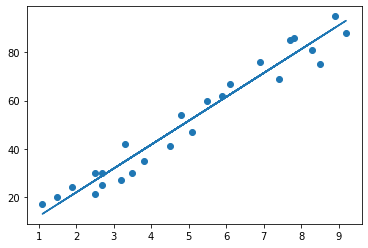

In [63]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

Prediction

In [64]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [65]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


Model Evaluation

In [66]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 4.183859899002975
